# **Mid Course Assessment - ML Case Study**

# **Project Name**    - Retail Sales Prediction

##### **Project Type**    - Regression


# **Project Summary -**

Rossmann, a retail chain, operates an extensive network of over 3,000 pharmacies across seven European countries. Presently, the store managers at Rossmann face the challenge of forecasting their daily sales for the upcoming six weeks. Numerous factors such as promotions, competition, school and state holidays, seasonal variations, and local demographics affect the sales performance of each store. Given the diverse circumstances of individual managers, the accuracy of sales predictions tends to vary significantly.

# **GitHub Link -**https://github.com/surajsamm/ML-Case-Study-Mid-Course-Summative-Assessment

# **Rossmann Stores Data Link -**https://drive.google.com/file/d/1qWsR2JtoUls3ScQwMEfcHAsK1cJ5q7JP/view?usp=drive_link

# **Store Link -**https://drive.google.com/file/d/1WVZmJRPtIGZ22aXy-GJ_d_Ji0m81tNq4/view?usp=drive_link

# **Problem Statement**

We have access to historical sales data from 1,115 Rossmann stores. Our objective is to predict the "Sales" column for the test set. It's worth noting that some stores in the dataset were temporarily closed due to renovation work.

# **Data Description**

The dataset includes two main files:

***Rossmann Stores Data.csv:*** This file contains historical data, including sales information.

***store.csv:*** This file provides supplemental details about the stores.
Data Fields:

***Id:*** An identifier representing a combination of store and date within the test set.
***Store:*** A unique identifier for each store.

***Sales:*** The turnover for a particular day (this is the target variable for prediction).

***Customers:*** The number of customers on a given day.

***Open:*** An indicator of whether the store was open (0 = closed, 1 = open).

***StateHoliday:*** Indicates a state holiday; typically, stores are closed on these days. Types include a = public holiday, b = Easter holiday, c = Christmas, 0 = None.

***SchoolHoliday:*** Indicates if the store was affected by the closure of public schools on that date.

***StoreType:*** Differentiates between four store models: a, b, c, d.

***Assortment:*** Describes the assortment level: a = basic, b = extra, c = extended.

***CompetitionDistance:*** The distance in meters to the nearest competitor store.

***CompetitionOpenSince[Month/Year]:*** Approximate year and month when the nearest competitor store opened.

***Promo:*** Indicates whether a store is running a promotion on that day.

***Promo2:*** Indicates whether the store is participating in a continuing and consecutive promotion (0 = not participating, 1 = participating).

***Promo2Since[Year/Week]:*** Describes the year and calendar week when the store started participating in Promo2.

***PromoInterval:*** Describes the consecutive intervals when Promo2 is initiated, listing the months the promotion begins anew. For example, "Feb,May,Aug,Nov" indicates that the promotion restarts in February, May, August, and November of any given year for that store.







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter /ML mid/store.csv', low_memory= False)

In [ ]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter /ML mid/Rossmann Stores Data.csv', low_memory= False)

## **Analysing the Store Dataset**

### Dataset First View

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count


In [ ]:
# Dataset Rows & Columns count
store_df.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = store_df.duplicated().sum()
print(f'The dataset contains {duplicate_count} duplicate rows.')

The dataset contains 0 duplicate rows.


### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = store_df.isnull().sum()
print('Missing Values/Null Values Count:')
print(missing_values_count)

print('=' *25)
# Calculating the percentage of missing or null values in each column of the dataset
missing_data_percentage = (store_df.isnull().sum() / len(store_df)) * 100
print('Missing Data Percentage:')
print(missing_data_percentage)

Missing Values/Null Values Count:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
Missing Data Percentage:
Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


**Heatmap for null values**

<Axes: >

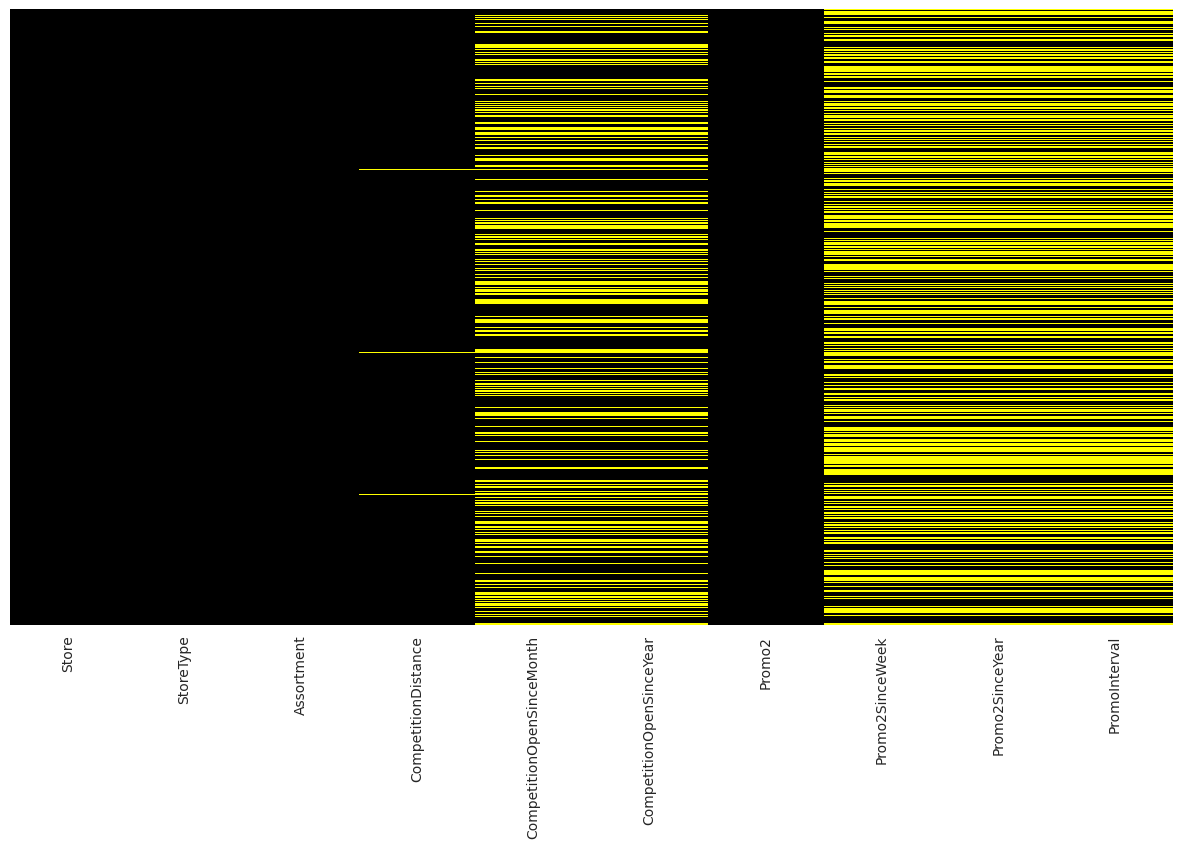

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

### **Remove features(columns) with high percentages of missing values**

#### We can observe that some features have a high percentage of missing values and they won't be accurate as indicators. Hence to ensure the accuracy of our analysis, we'll exclude features with more than 30% missing values from our dataset.

In [ ]:
#Drop features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

#### **Replace missing values in features with low percentages of missing values**

<ipython-input-11-a8e30cb2c49f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

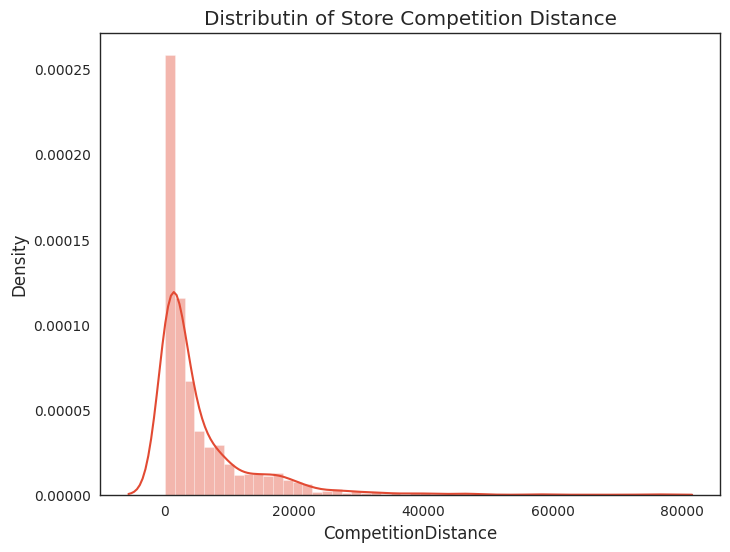

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")


#### Given the right-skewed nature of the distribution, opting to replace missing values with the median proves prudent. This strategy mitigates the influence of outliers and ensures a more robust representation of the central tendency.

In [ ]:
# Replacing missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

# **EDA for Store Data**

# Distribution Of Different Store Types

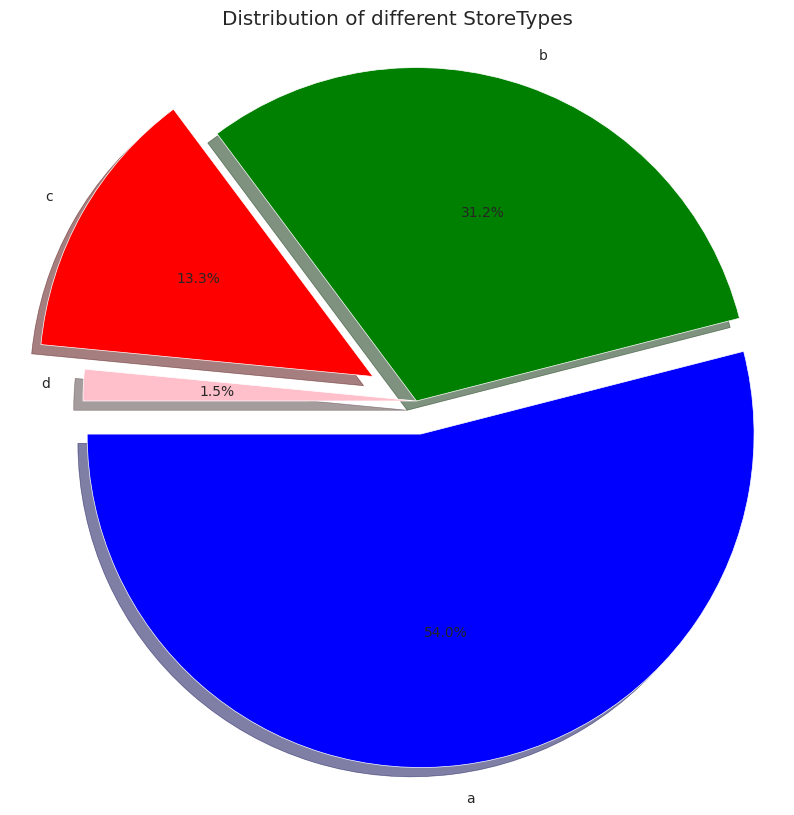

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['blue', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Pairplot for Store Dataset

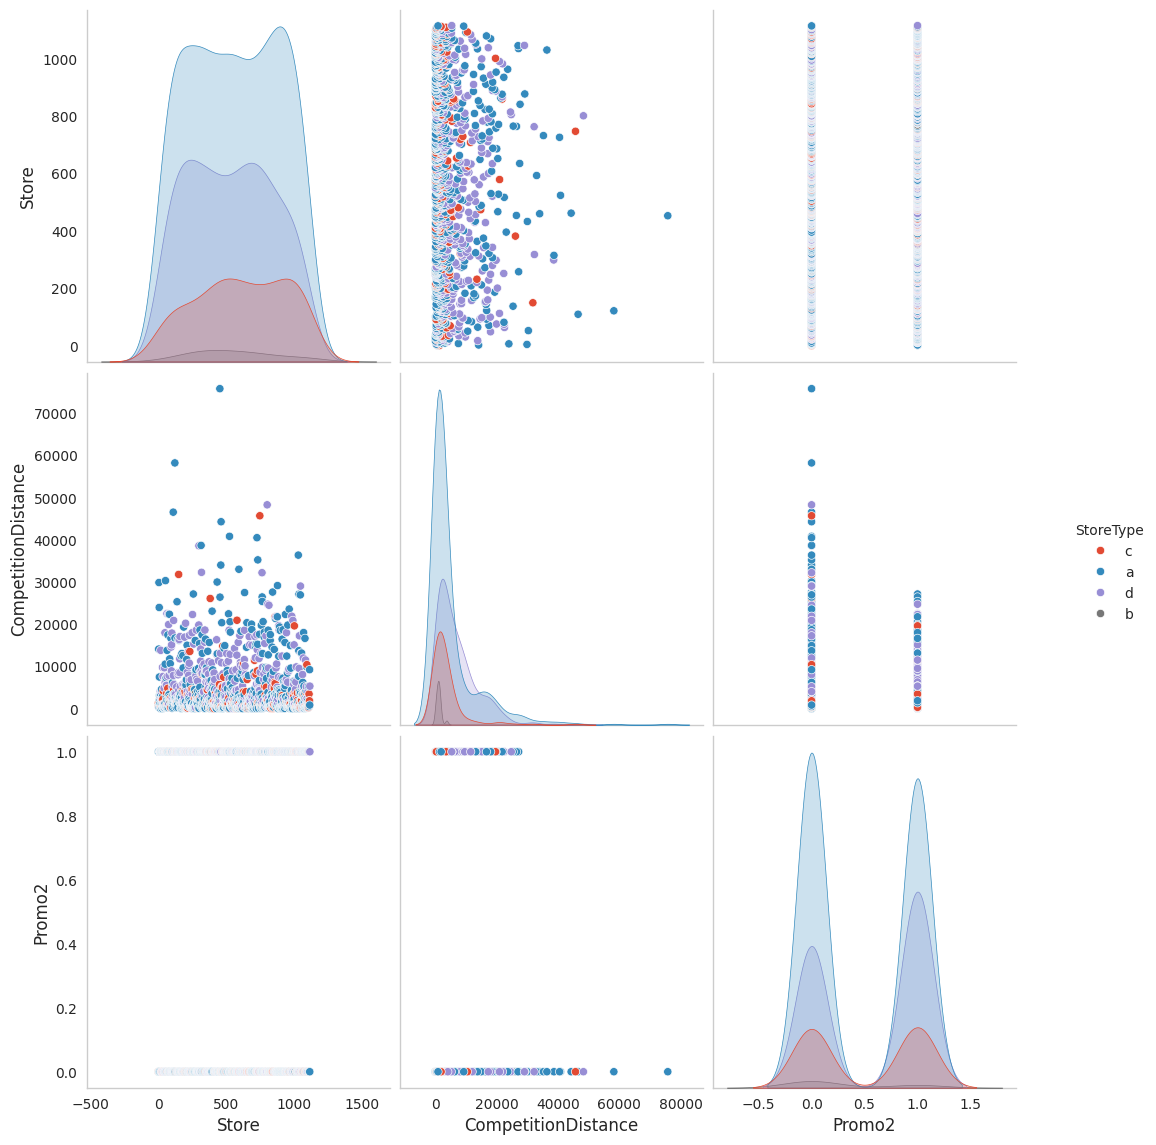

In [ ]:
#Pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(12,12);

# Checking stores with their assortment type

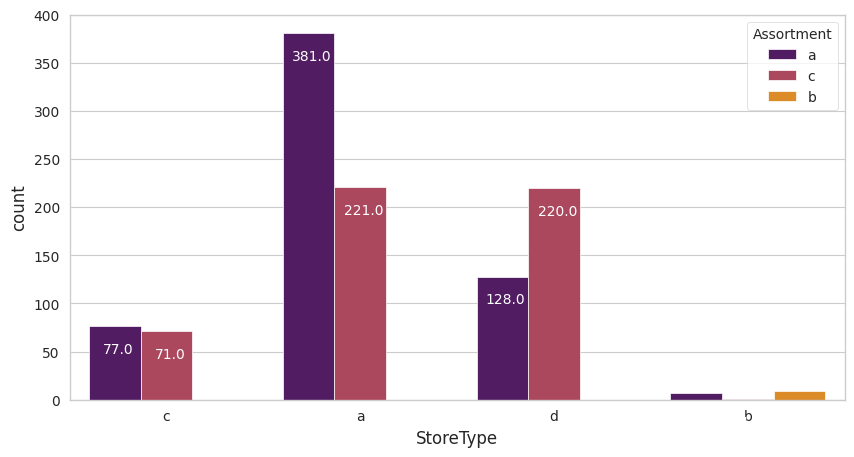

In [ ]:
#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

# Analysing the Rossman Dataset

In [ ]:
# Dataset First Look
rossman_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


# Checking Information about Dataset

In [ ]:
# Dataset Rows & Columns count
rows, columns =rossman_df.shape

print(f'The Rossman dataset has {rows} rows and {columns} columns')

The Rossman dataset has 1017209 rows and 9 columns


# Dataset Information

In [ ]:
# Dataset Info
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


# Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = rossman_df.duplicated().sum()
print(f'The Rossman dataset contains {duplicate_count} duplicate rows.')


The Rossman dataset contains 0 duplicate rows.


# Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = rossman_df.isnull().sum()
print('Missing Values/Null Values Count:')
print(missing_values_count)

print('=' *25)
# Calculating the percentage of missing or null values in each column of the dataset
missing_data_percentage = (rossman_df.isnull().sum() / len(rossman_df)) * 100
print('Missing Data Percentage:')
print(missing_data_percentage)

Missing Values/Null Values Count:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Missing Data Percentage:
Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


In [ ]:
# Dataset Describe
rossman_df.describe().T   # The describe() method to generate descriptive statistics for the DataFrame columns.
                         # The .T attribute transposes the result, swapping rows and columns

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


# Check Unique Values for each variable

In [ ]:
# Check Unique Values for each variable.

# Iterating through each column in the DataFrame
for i in rossman_df.columns.tolist():
  print("Number of unique values in",i,"is",rossman_df[i].nunique())

Number of unique values in Store is 1115
Number of unique values in DayOfWeek is 7
Number of unique values in Date is 942
Number of unique values in Sales is 21734
Number of unique values in Customers is 4086
Number of unique values in Open is 2
Number of unique values in Promo is 2
Number of unique values in StateHoliday is 4
Number of unique values in SchoolHoliday is 2


In [ ]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

,count
StateHoliday,
0,986159
a,20260
b,6690
c,4100


In [ ]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


This tells us we have a data of almost 3 years.

In [ ]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [ ]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [ ]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  WeekOfYear     1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


## *EDA On Rossman Dataset*

# Countplot

<Axes: xlabel='DayOfWeek', ylabel='count'>

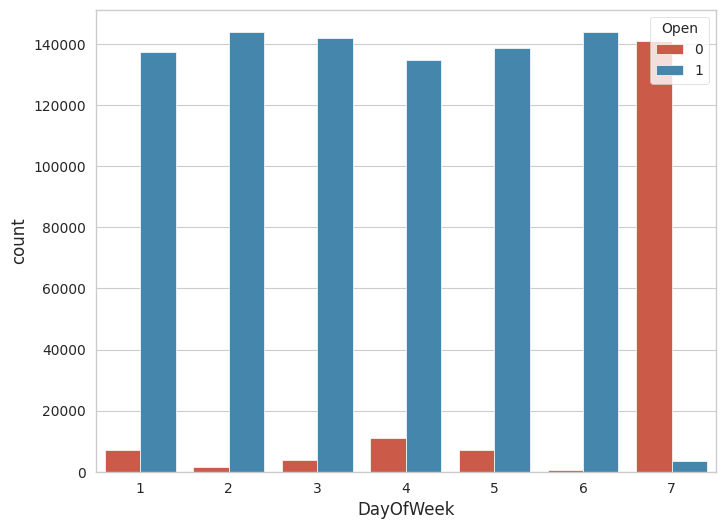

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

As we can observe that Stores mainly closed on Sunday

# Impact of Promo on Sales

<Axes: xlabel='Promo', ylabel='Sales'>

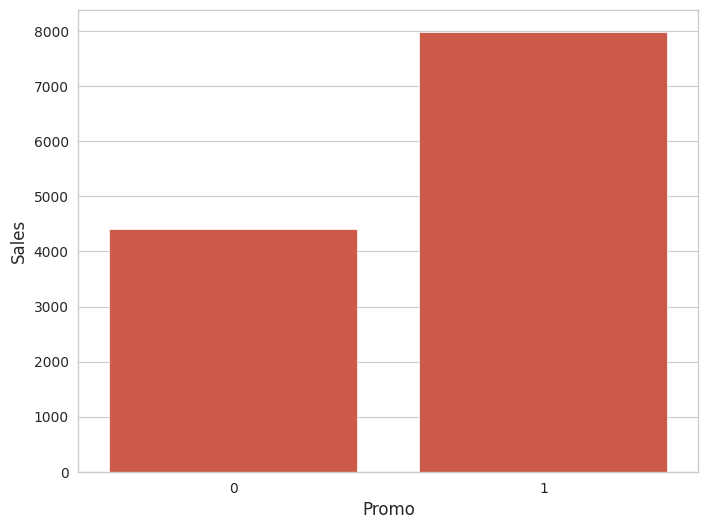

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

Sales Are nearly doubled when Promo is running.

# Months Vs Sales

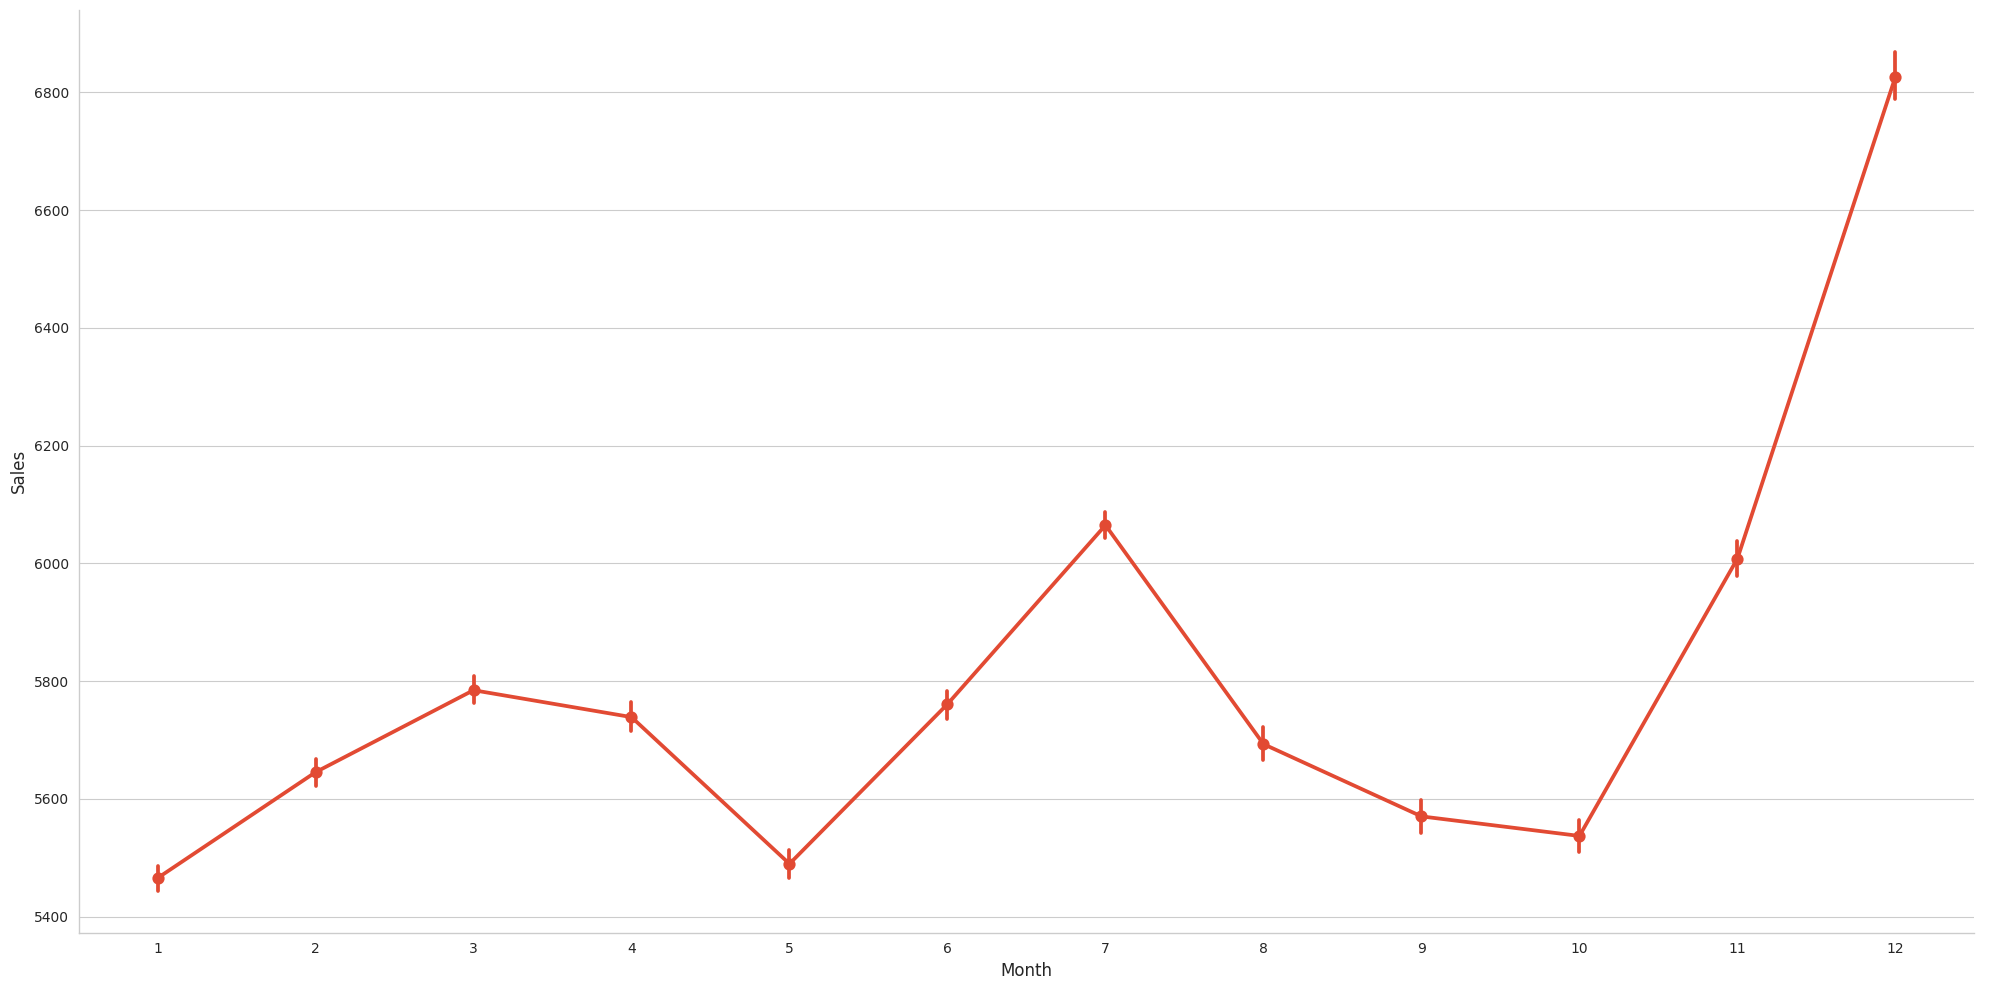

In [ ]:
sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2,height=10)

As We can obsreve that in the month of November and specially in December Sales is increasing rapidly every year on the christmas eve.

# Sales affected by Schoolholiday or Not

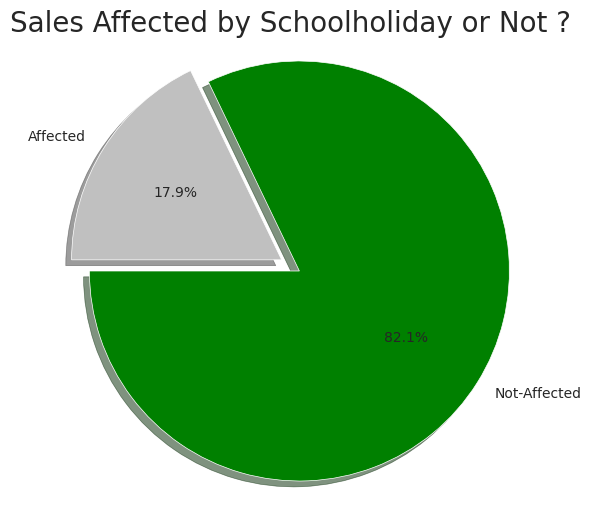

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['green', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday.

# Transforming Variable StateHoliday

In [ ]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rossman_df.StateHoliday.value_counts()

,count
StateHoliday,
0,986159
1,31050


# Sales Affected by State holiday or Not

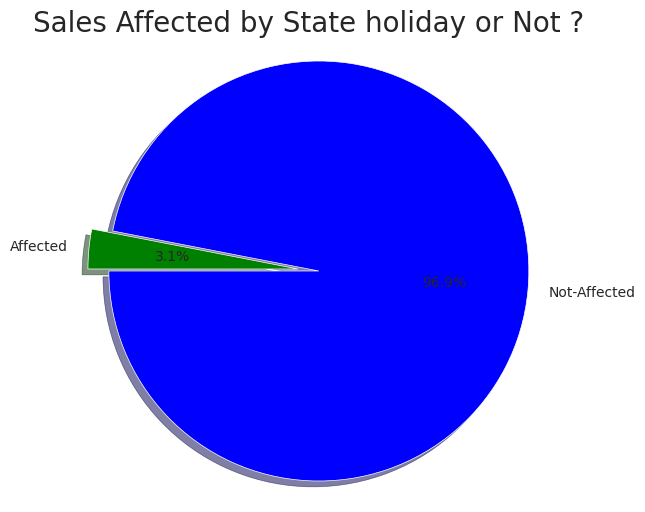

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['blue','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

As Sales isn't much affected by State Holiday so we can remove this column.

In [ ]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

# Distribution of sales

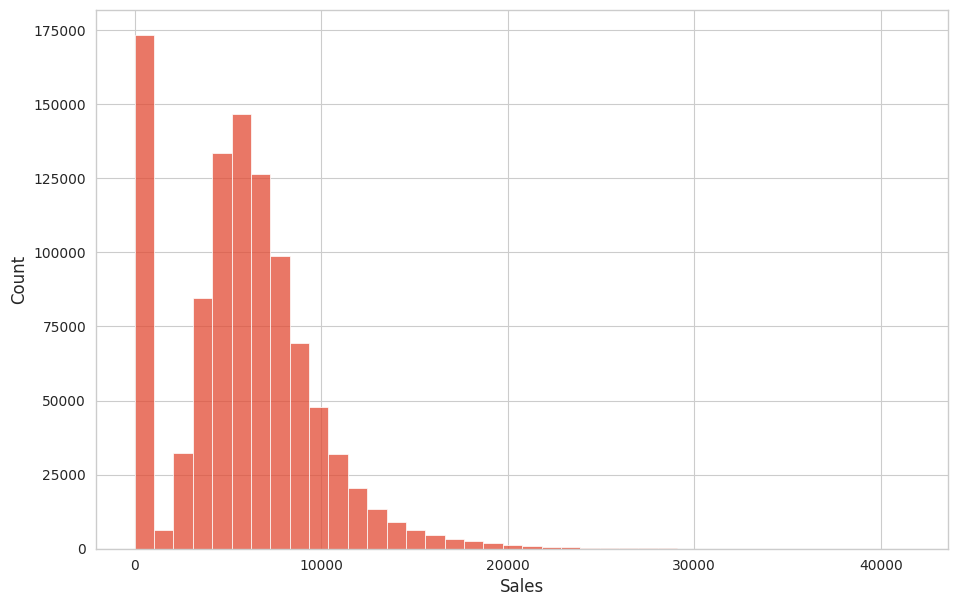

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(rossman_df['Sales'], kde = False,bins=40);

Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.

# Sales Vs Customers

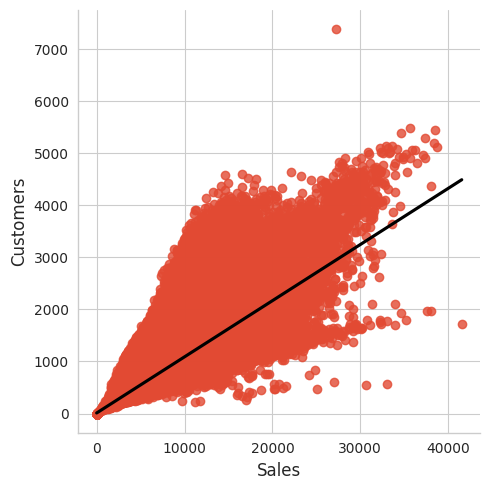

In [ ]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'black'});

# Heatmap of the Rossman Dataset

<Axes: >

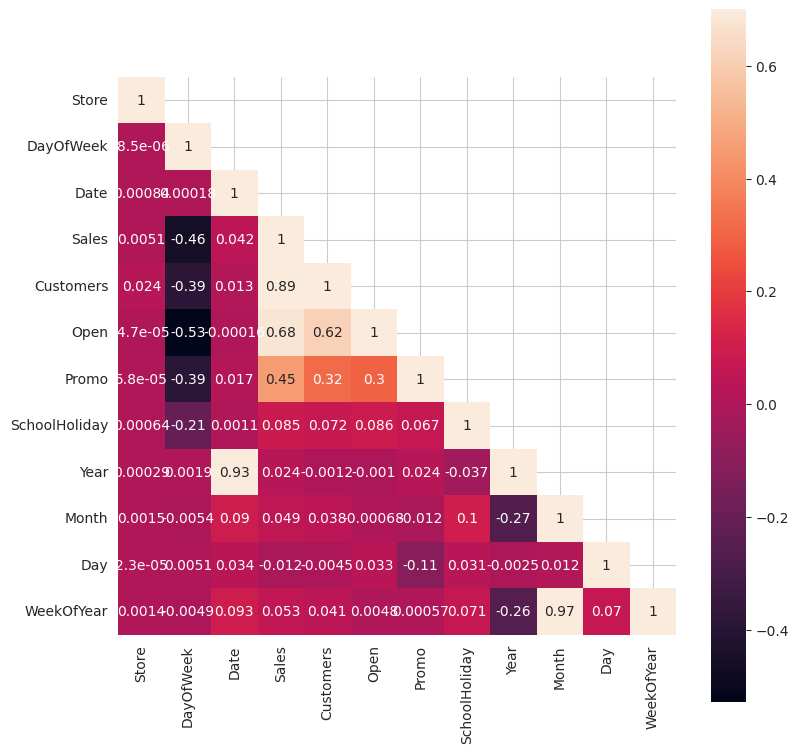

In [ ]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

# **Merging the Two Datasets**

In [ ]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [ ]:
df.shape

(1017209, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   SchoolHoliday        1017209 non-null  int64         
 8   Year                 1017209 non-null  int64         
 9   Month                1017209 non-null  int64         
 10  Day                  1017209 non-null  int64         
 11  WeekOfYear           1017209 non-null  int64         
 12  StoreType            1017209 non-null  object        
 1

## **EDA On Merged Dataset**

# Store Type vs Other Features

In [ ]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

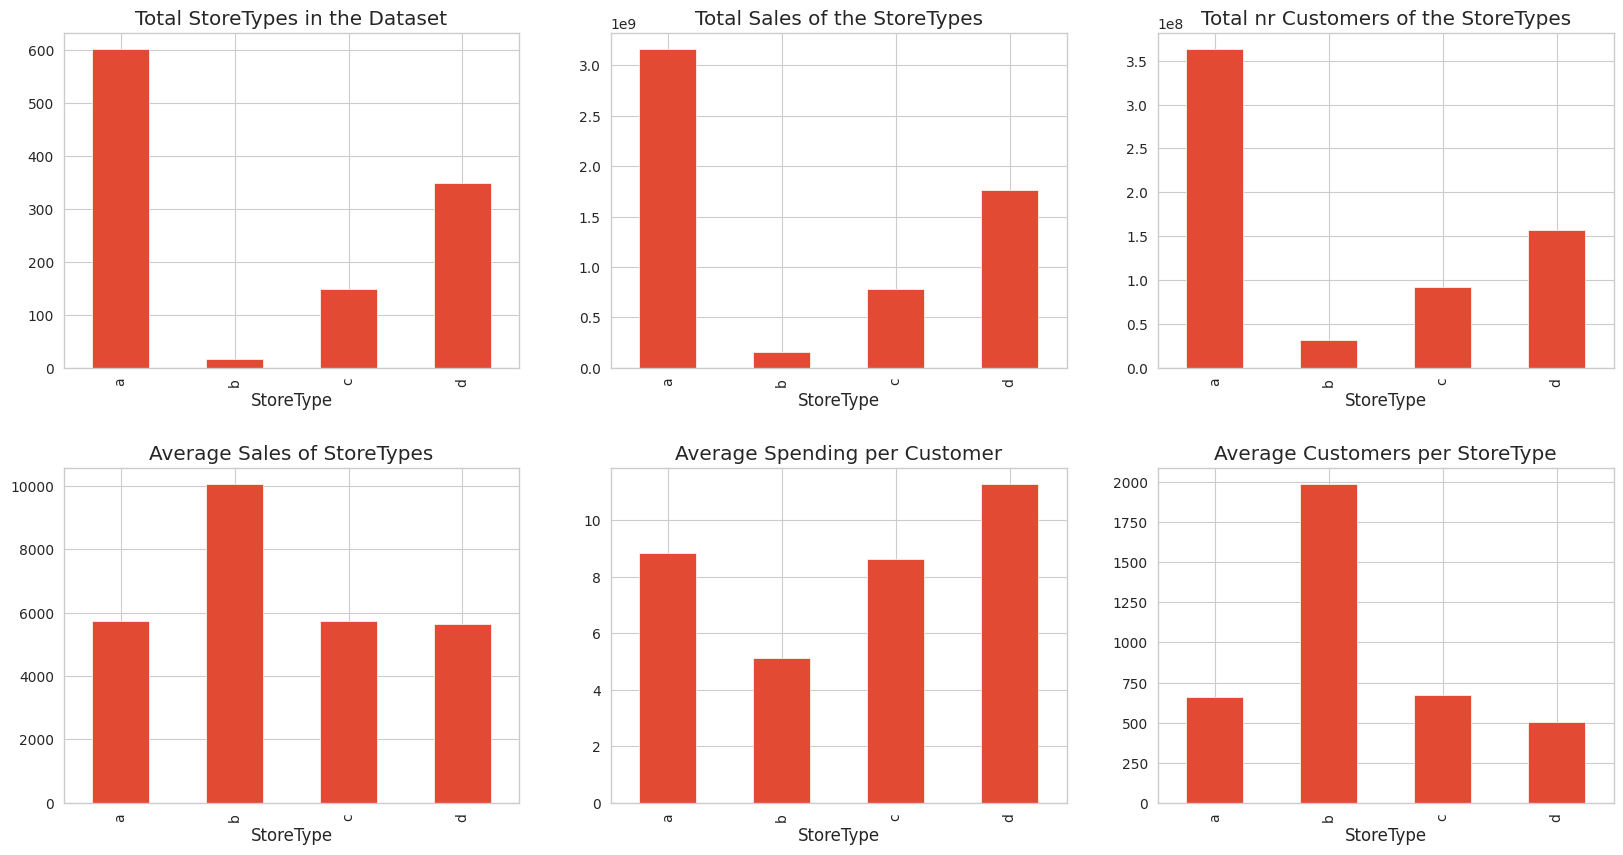

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

Here we can observe from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers

# Let's go ahead with the promotions

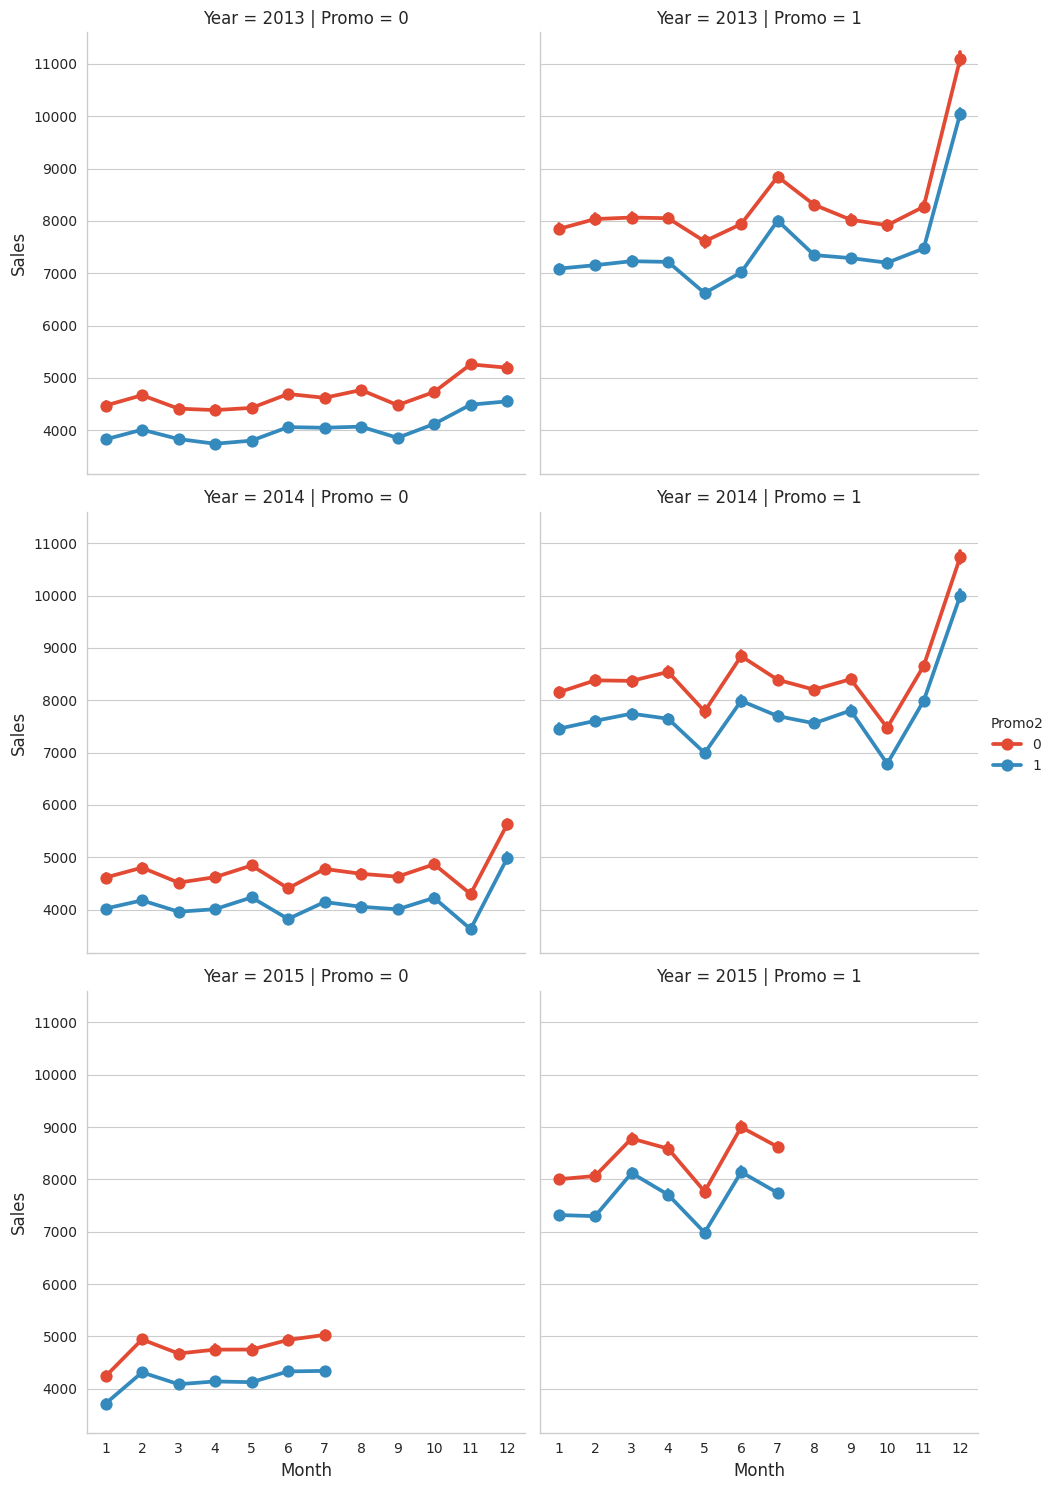

In [ ]:
import seaborn as sns

sns.catplot(data=df, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind='point')


It can be observed, if the stores are having promotion the sales are higher.
Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

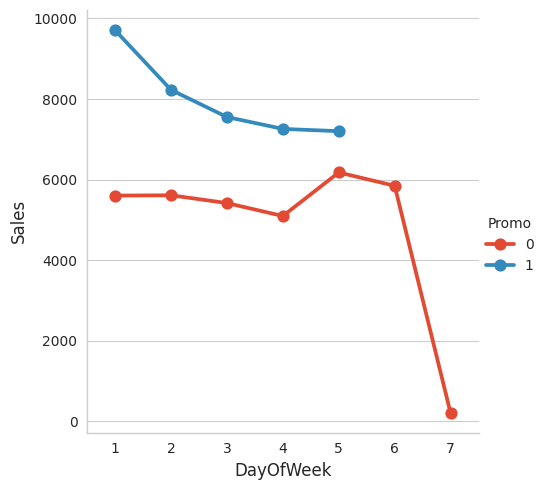

In [ ]:
import seaborn as sns

sns.catplot(data=df, x="DayOfWeek", y="Sales", hue="Promo", kind="point")

As We can see that when the promo is running Sales are high

In [ ]:
print("""So, it seems there's no promotion during the weekend. Nevertheless, when stores run promotions, sales skyrocket.
Sunday appears to be the star performer in terms of sales. It's not surprising why.
""")
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores open on Sundays.")


So, it seems there's no promotion during the weekend. Nevertheless, when stores run promotions, sales skyrocket.
Sunday appears to be the star performer in terms of sales. It's not surprising why.

There are 33 stores open on Sundays.


# The trends on a yearly basis.

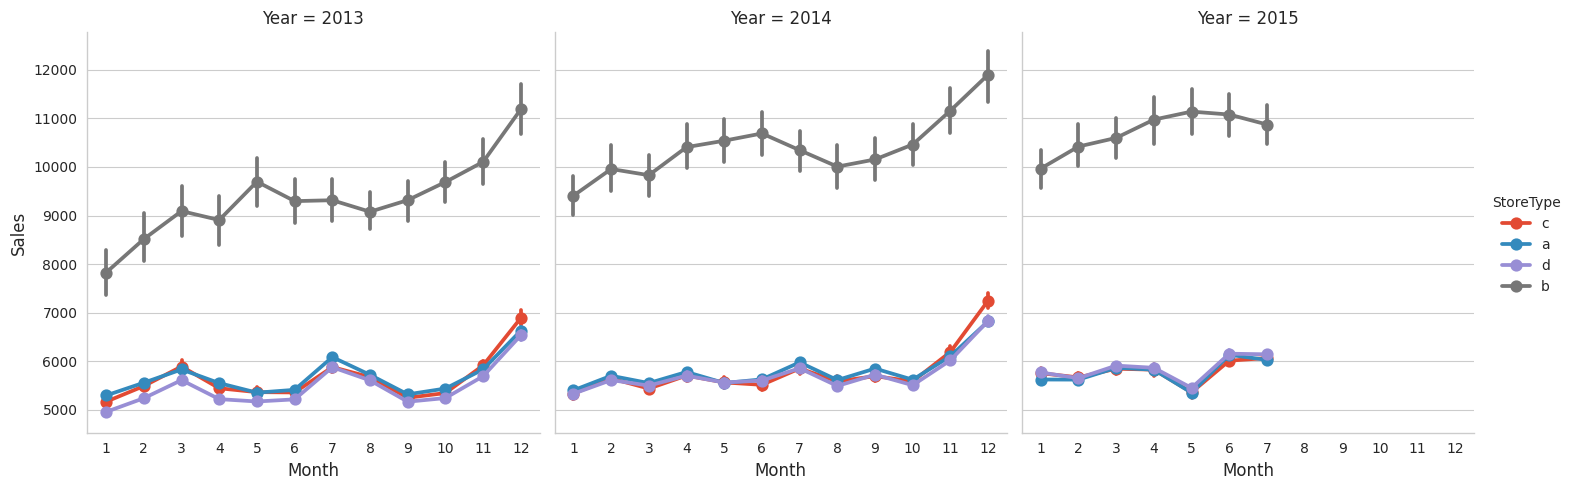

In [ ]:
sns.catplot(data=df, x="Month", y="Sales", col="Year", hue="StoreType", kind="point")

 We can see a seasonalities, but not trends. The sales stays constantly yearly.

# Impact of the Competition Distance on the sales.

In [ ]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

<ipython-input-58-eff5c4da511b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
<ipython-input-58-eff5c4da511b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

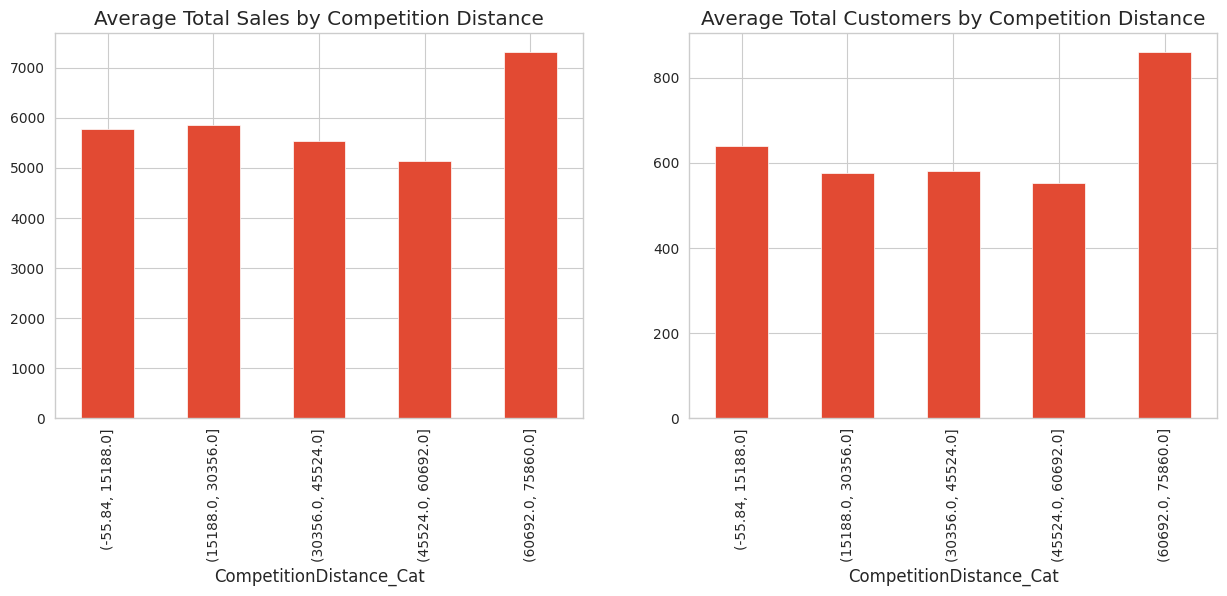

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [ ]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

# Outliers

<Axes: ylabel='Sales'>

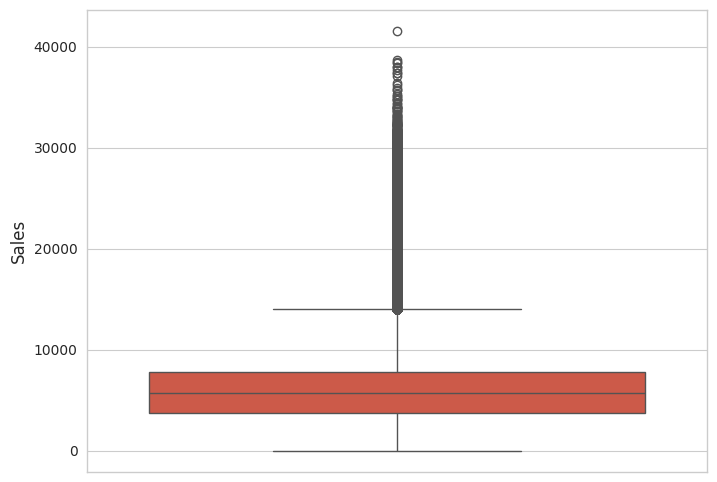

In [ ]:
#checking outliers in sales
sns.boxplot(rossman_df['Sales'])

Box plot shows that we have a very high outliers in sales

# Removing Outliers Of Sales Column

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990515 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                990515 non-null  int64         
 1   DayOfWeek            990515 non-null  int64         
 2   Date                 990515 non-null  datetime64[ns]
 3   Sales                990515 non-null  int64         
 4   Customers            990515 non-null  int64         
 5   Open                 990515 non-null  int64         
 6   Promo                990515 non-null  int64         
 7   SchoolHoliday        990515 non-null  int64         
 8   Year                 990515 non-null  int64         
 9   Month                990515 non-null  int64         
 10  Day                  990515 non-null  int64         
 11  WeekOfYear           990515 non-null  int64         
 12  StoreType            990515 non-null  object        
 13  Assortment        

# Heatmap Of Merged Dataset

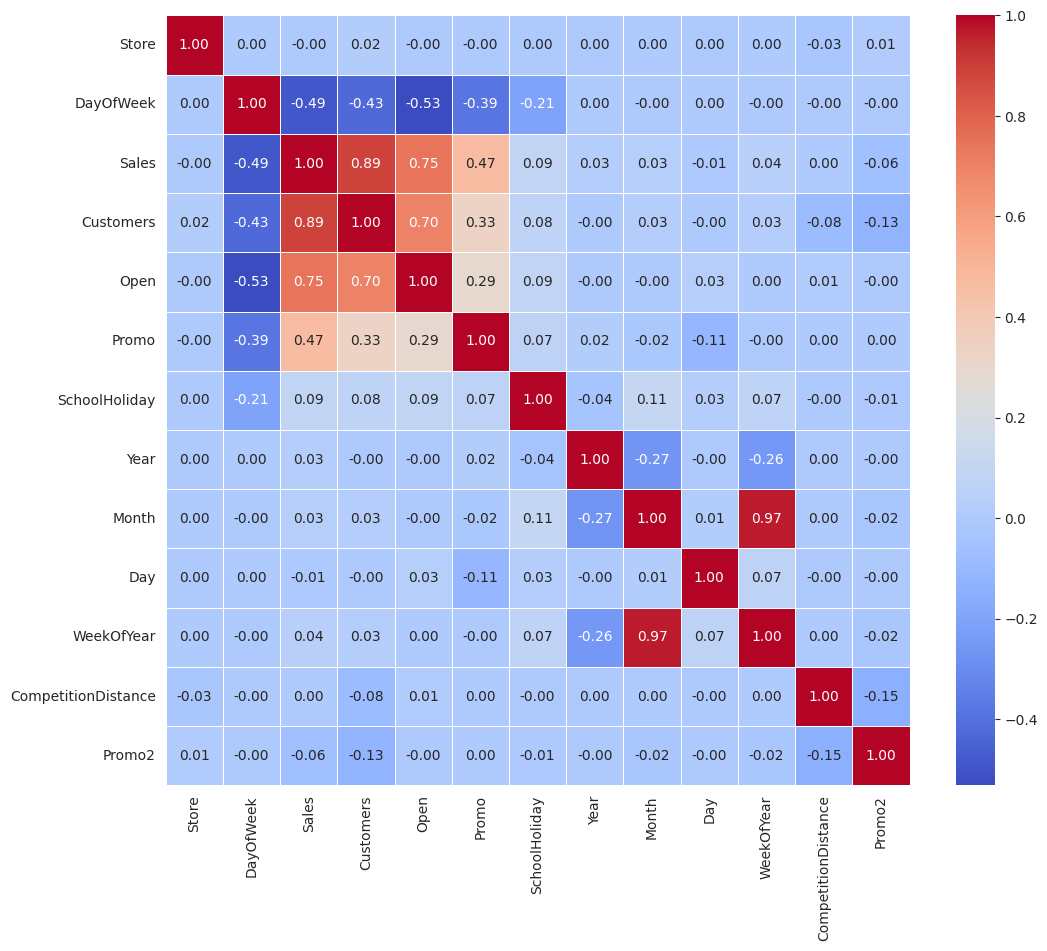

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()



**Conclusion of the EDA:**

**1. There is a strong correlation between Sales and the number of Customers.**

This indicates that an increase in foot traffic is likely to lead to higher sales, demonstrating a significant relationship between these two factors.

**2. Store Type A is the most popular and frequented.**

Store Type A stands out as the most sought-after and busiest, presumably drawing in a larger customer base and achieving greater sales figures.

**3. Store Type B records the lowest Average Sales per Customer.**

This suggests that patrons of Store Type B generally spend less on average during their visits, indicating that this store may appeal to customers making smaller purchases or seeking specific items.

**4. Store Type D boasts the highest average transaction size.**

Store Type D appears to have the largest average purchase volume per customer visit, suggesting that customers at this store tend to buy more items in each transaction.

**5. Promotions are conducted exclusively on weekdays.**

Promotional activities are noted to occur solely during weekdays, indicating that these efforts are aimed at boosting sales throughout the standard business week.

**6. Promotions result in increased Sales and Customer traffic across all stores.**

The implementation of promotions leads to a rise in both sales and customer numbers for all store types, highlighting the effectiveness of such initiatives in enhancing traffic and revenue.

**7. A greater number of stores operate during School holidays compared to State holidays.**

There is a noticeable increase in the number of stores open during school holidays relative to state holidays, suggesting that retailers expect heightened demand during school breaks.

**8. Stores operating during School Holidays achieve higher sales than on regular days.**

This indicates that school holidays are associated with increased consumer spending, resulting in elevated sales for stores that remain operational during these times.

**9. Sales experience a surge during the Christmas week, likely due to increased demand for beauty products.**

The increase in sales during the Christmas week may be linked to a rise in consumer demand, particularly for beauty products.

# **Drop Subsets Of Data Where Might Cause Bias**

In [ ]:
# Where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [ ]:
df_new=df.copy()  #to keep original data safe

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,False,False,True,False,True,False,False
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,True,False,False,False,True,False,False
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,True,False,False,False,True,False,False
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,False,False,True,False,False,False,True
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,True,False,False,False,True,False,False


Sales in terms of days of the week

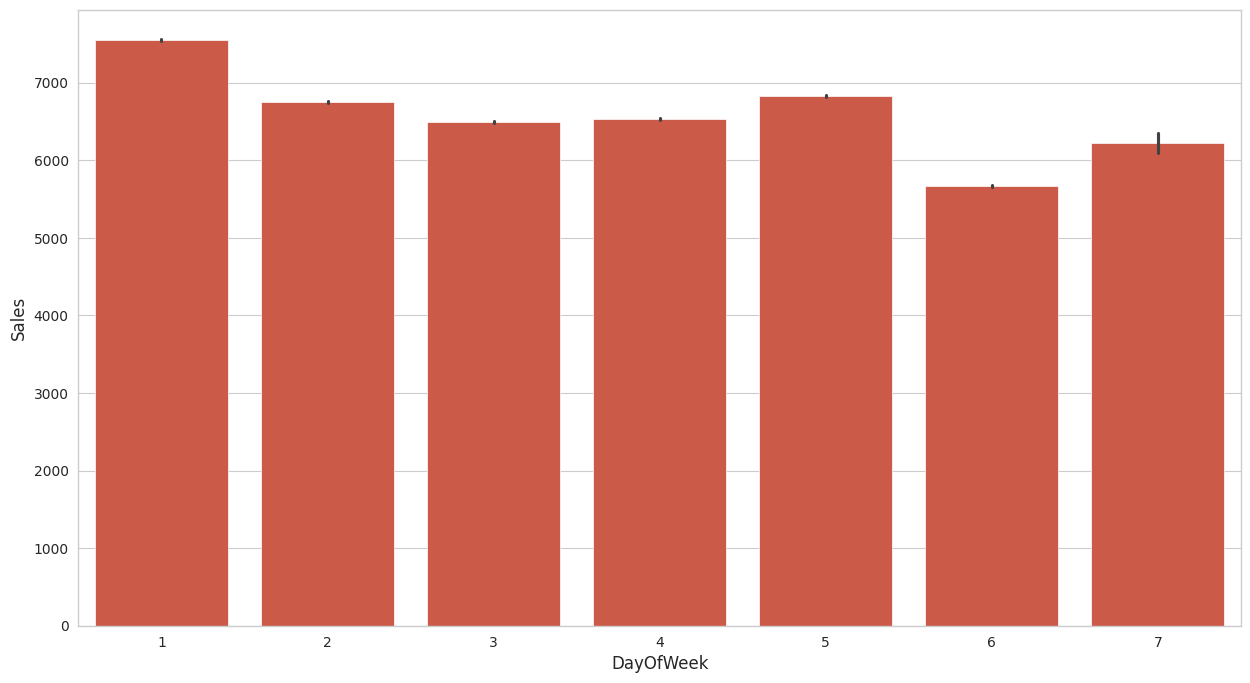

In [ ]:
#plot for sales in terms of days of the week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);

# Setting Features and Target Variables

In [ ]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [ ]:
X.shape

(817644, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,False,False,True,False,True,False,False
1,5,625,1,1,7,31,31,570.0,1,True,False,False,False,True,False,False
2,5,821,1,1,7,31,31,14130.0,1,True,False,False,False,True,False,False
3,5,1498,1,1,7,31,31,620.0,0,False,False,True,False,False,False,True
4,5,559,1,1,7,31,31,29910.0,0,True,False,False,False,True,False,False


In [ ]:
y.head()

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817644 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            817644 non-null  int64  
 1   Customers            817644 non-null  int64  
 2   Promo                817644 non-null  int64  
 3   SchoolHoliday        817644 non-null  int64  
 4   Month                817644 non-null  int64  
 5   Day                  817644 non-null  int64  
 6   WeekOfYear           817644 non-null  int64  
 7   CompetitionDistance  817644 non-null  float64
 8   Promo2               817644 non-null  int64  
 9   StoreType_a          817644 non-null  bool   
 10  StoreType_b          817644 non-null  bool   
 11  StoreType_c          817644 non-null  bool   
 12  StoreType_d          817644 non-null  bool   
 13  Assortment_a         817644 non-null  bool   
 14  Assortment_b         817644 non-null  bool   
 15  Assortment_c         

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 817644 entries, 0 to 1017190
Series name: Sales
Non-Null Count   Dtype
--------------   -----
817644 non-null  int64
dtypes: int64(1)
memory usage: 12.5 MB


# Splitting Dataset Into Training Set and Test Set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

# **Implementing Supervised Machine Learning algorithms.**

# 1. Linear Regression (OLS)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-1507.441798569973

In [ ]:
regressor.coef_

array([-1.30381346e+02,  3.06863041e+04,  1.09386001e+03,  2.29418388e+01,
        3.54223020e+02,  3.82831239e+01, -1.58021936e+02,  1.82430640e+03,
        3.10732033e+02,  3.18132398e+02, -1.90167603e+03,  1.67419398e+02,
        1.41612423e+03,  1.44688318e+03, -3.17950648e+03,  1.73262330e+03])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1329406.2402058854

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1152.998803210951

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807496727472854

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823919595957616

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

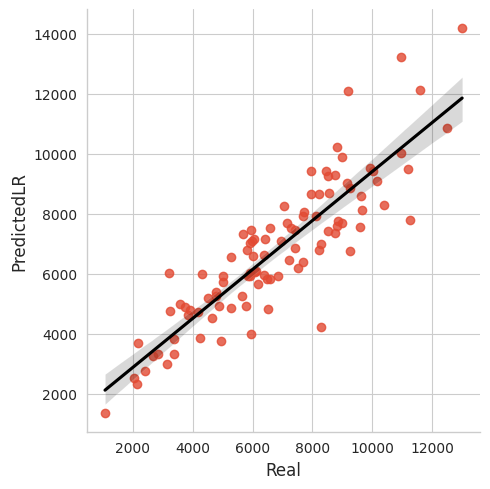

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

# Inferences On Linear Regression Coefficients

In [ ]:
import numpy as np
import statsmodels.api as sm

# Convert data to numpy arrays
X = np.asarray(X)
y = np.asarray(y)

# Add intercept to the input data
X = sm.add_constant(X)

# Convert data to float type to ensure compatibility with np.isfinite()
X = X.astype(float)
y = y.astype(float)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Print out the statistics summary
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.086e+05
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:14:36   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -993.1075      5.669   -175.169      0.0

# **2. LARS (Least Angle Regression) Lasso Regression**

In [ ]:
from sklearn.linear_model import LassoLars

# Initialize the LassoLars model with specified parameters
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)

# Fit the model to the training data
lasreg = las.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:114: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7807308911324253 , Out of Sample Test Score : 0.7823685232825739
Training RMSE : 1155.07694652747 Testing RMSE : 1153.0608903320883
Training MAPE : 14.215633319957135 Testing MAPE : 14.233294529232596


# **3. Decision Tree Regression**

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999957301266714 , Test Score : 0.9157434759928238
Training RMSE : 5.097176662035323 Testing RMSE : 717.4525056363047
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.6444511123976895


In [ ]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

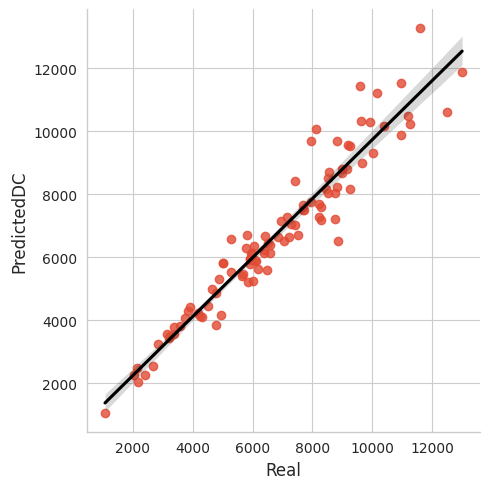

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# **Conclusion**

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3],'Test_Score':[test_score_1,test_score_2,test_score_3]},index=['Linear Regression','Lasso Regression','Decision Tree'])

In [ ]:
score_df

,Train_Score,Test_Score
Linear Regression,0.780750,0.782392
Lasso Regression,0.780731,0.782369
Decision Tree,0.999996,0.915743


The evaluation results clearly indicate that the three machine learning models—Linear Regression, Lasso Regression, and Decision Tree—exhibit differing levels of effectiveness in predicting the target variable.

Both the Linear Regression and Lasso Regression models display comparable predictive performance, with R-squared values around 0.78 and Mean Squared Error figures also near 0.78. This implies that these models provide a satisfactory level of predictive accuracy and are capable of effectively modeling the relationships between the independent and dependent variables within the dataset.

Conversely, the Decision Tree model demonstrates exceptional performance, achieving an extraordinarily high R-squared score of approximately 1 (0.999996) and a low Mean Squared Error of 0.9158. These findings suggest that the Decision Tree model nearly perfectly predicts the target variable and has minimal prediction errors.

Nevertheless, it is important to acknowledge the potential limitations of the Decision Tree model, particularly its tendency to overfit, especially in complex datasets. Despite its impressive performance in this assessment, further evaluation is warranted to determine its generalization capabilities and appropriateness for practical applications.

In summary, while each model presents unique advantages and disadvantages, the Decision Tree model stands out as the most effective in terms of predictive accuracy for the analyzed dataset. However, it is vital to carefully consider the specific needs and characteristics of the application area when selecting the most suitable model for implementation.